In [96]:
# Nome: Arthur Peres Hernandes - RA: 533901
# Nome: Lucas Barbosa da Cunha - RA: 533781

# TDE 1 - Sistemas Inteligentes
# Link do datasheet: https://www.kaggle.com/brsdincer/star-type-classification

In [97]:
# Importando a biblioteca do pandas, onde iremos ler, tratar o nossa datasheet.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [98]:
# Lendo o arquivo cvs que está inserido no drive.
df_path = '/content/drive/MyDrive/SistemasInteligentes/dataset/'
df_name = 'Stars.csv'

df = pd.read_csv(df_path + df_name)

In [99]:
# Mostra o total de linha e colunas do datasheet.
df.shape

(240, 7)

In [100]:
# Força o panda não omitir nenhuma coluna.
# Força o panda não omitir nenhuma linha.
# Obs: para obter o maximo de linha e colunas que o datasheet tem utilizamos a função SHAPE do pandas.
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 240)

In [101]:
# Imprimindo as 5 primeiras linhas do nosso datasheet, aceitando como parâmetro o total de linha que eu quero imprimir.
# Ex: df.head(1000)
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [102]:
#Tratando as colunas Color, Spectral Class para sua conversão para inteiro.
Color_desc = ['Red', 'Blue White', 'white', 'Yellowish white', 'Pale yellow orange', 'Blue-white', 'Whitish', 'yellow-white', 'Orange', 'Blue', 'White-Yellow', 'White', 'yellowish', 'Yellowish', 'Orange-Red', 'Yellowish White', 'Blue-White', 'Blue white']
Color_cod = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

df['Color'].replace(Color_desc, Color_cod, inplace = True)

Spectral_Class_desc = ['M', 'B', 'A', 'F', 'O', 'K', 'G']
Spectral_Class_cod = [1, 2, 3, 4, 5, 6, 7]

df['Spectral_Class'].replace(Spectral_Class_desc, Spectral_Class_cod, inplace = True)

df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,1,1,0
1,3042,0.000500,0.1542,16.60,1,1,0
2,2600,0.000300,0.1020,18.70,1,1,0
3,2800,0.000200,0.1600,16.65,1,1,0
4,1939,0.000138,0.1030,20.06,1,1,0


In [103]:
_# Mostra os tipos de dados de cada coluna.
# Vemos que só possui um tipo de coluna que está em formato STRING.
print(df.dtypes)

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color               int64
Spectral_Class      int64
Type                int64
dtype: object


In [104]:
# Pega todas as linhas que não possuirem NaN no nosso dataset
# Como não possui nenhuma não há necessidade de realizar a troca pela média ou mediana
data_without_nan = df.dropna()
print(data_without_nan.shape)

(240, 7)


In [77]:
# Mostra a correlação utilizando o método de PEARSON.
df.corr(method = 'pearson')

,Temperature,L,R,A_M,Color,Spectral_Class,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.560704,0.527404,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.258598,0.409473,0.676845
R,0.064216,0.526516,1.000000,-0.608728,-0.069164,0.001467,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.279397,-0.433673,-0.955276
Color,0.560704,0.258598,-0.069164,-0.279397,1.000000,0.737821,0.378413
Spectral_Class,0.527404,0.409473,0.001467,-0.433673,0.737821,1.000000,0.477165
Type,0.411129,0.676845,0.660975,-0.955276,0.378413,0.477165,1.000000


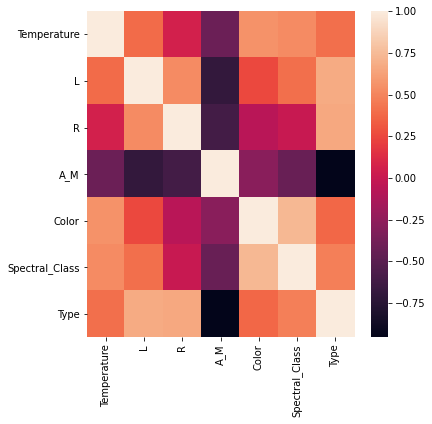

In [78]:
# Cria uma figura de retangulo de um tamanho 6x6.
plt.figure(figsize = (6, 6))

# Utiliza o seaborn para fazer uma figurinha de calor utilizando o retangulo acima.
sb.heatmap(df.corr(method = 'pearson'))

# Mostra a figura de calor.
plt.show();

In [79]:
# Definindo as variaveis preditoriais e a variavel alvo.
# Ou também variavel Independente X e Dependente Y
y = df['Color']
x = df.drop('Color', axis = 1)

In [94]:
# Faz a normalização dos dados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

norma = MinMaxScaler(feature_range = (0, 1))
x_norm = norma.fit_transform(x);

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.3, random_state = 10)

model = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan', p = 1)
model.fit(x_train, y_train)

result = model.score(x_test, y_test)
print('Acuracy: ', result)

Acuracy:  0.8194444444444444


In [95]:
# Pega os melhores parametros para o nosso dataset, assim podemos refinar com mais precisão.
values_k = np.array([3, 5, 7, 9, 11])
metric = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
values_p = np.array([1, 2, 3, 4])

values_grid = {'n_neighbors': values_k, 'metric': metric, 'p': values_p}

model = KNeighborsClassifier()

grid = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
grid.fit(x_norm, y)

print("Best Acuracy", grid.best_score_)
print("Param K", grid.best_estimator_.n_neighbors)
print("Param Metric", grid.best_estimator_.metric)
print("Param P", grid.best_estimator_.p)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best Acuracy 0.8458333333333332
Param K 9
Param Metric manhattan
Param P 1
